<a href="https://colab.research.google.com/github/Mounika457vj/error/blob/main/project_expo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN Architecture:¶
Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
Conv -> BN -> Activation -> Conv -> BN -> Activation -> MaxPooling
Flatten
Dense -> BN -> Activation
Dense -> BN -> Activation
Dense -> BN -> Activation
Output layer


In [1]:
!pip install keras
!pip install tensorflow



In [2]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'





In [7]:
import zipfile
zip_ref=zipfile.ZipFile('/content/archive.zip','r')
zip_ref.extractall('/content')
zip_ref.close()



In [8]:
#data generator
train_dir='/content/data/train'
val_dir='/content/data/test'

num_train=30000
num_val=8123
batch_size=64
num_epoch=50

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator =train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"


)

validation_generator =val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"

)






Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [9]:
no_of_classes=8
#models
model=Sequential()

#1 layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2layer
model.add(Conv2D(62,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#3layer
model.add(Conv2D(120,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#4layer
model.add(Conv2D(120,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


#flatten layer

model.add(Flatten())

#input layer

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))



#output layer
model.add(Dense(no_of_classes,activation='softmax'))

opt = Adam(learning_rate= 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 62)        17918     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 62)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 120)         67080     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 120)        

In [ ]:
mode=input()
file_path = os.path.abspath('model.h5')

if mode == "train":
    model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001)
,metrics=['accuracy'])
    model_info = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights('model.h5')

elif mode == "display":
    model.load_weights('model.h5')

cv2.ocl.setUseOpenCL(False)


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
emoji_dist={0:"emojis/angry.png",1:"emojis/disgusted.png",2:"emojis/fearful.png",3:"emojis/happy.png",4:"emojis/neutral.png",5:"emojis/sad.png",6:"emojis/surpriced.png"}


train
Epoch 1/50


InvalidArgumentError: ignored

In [10]:
from tensorflow.keras.preprocessing.image import load_img


In [11]:
picture_size=64
folder_path="/content/data"

ValueError: ignored

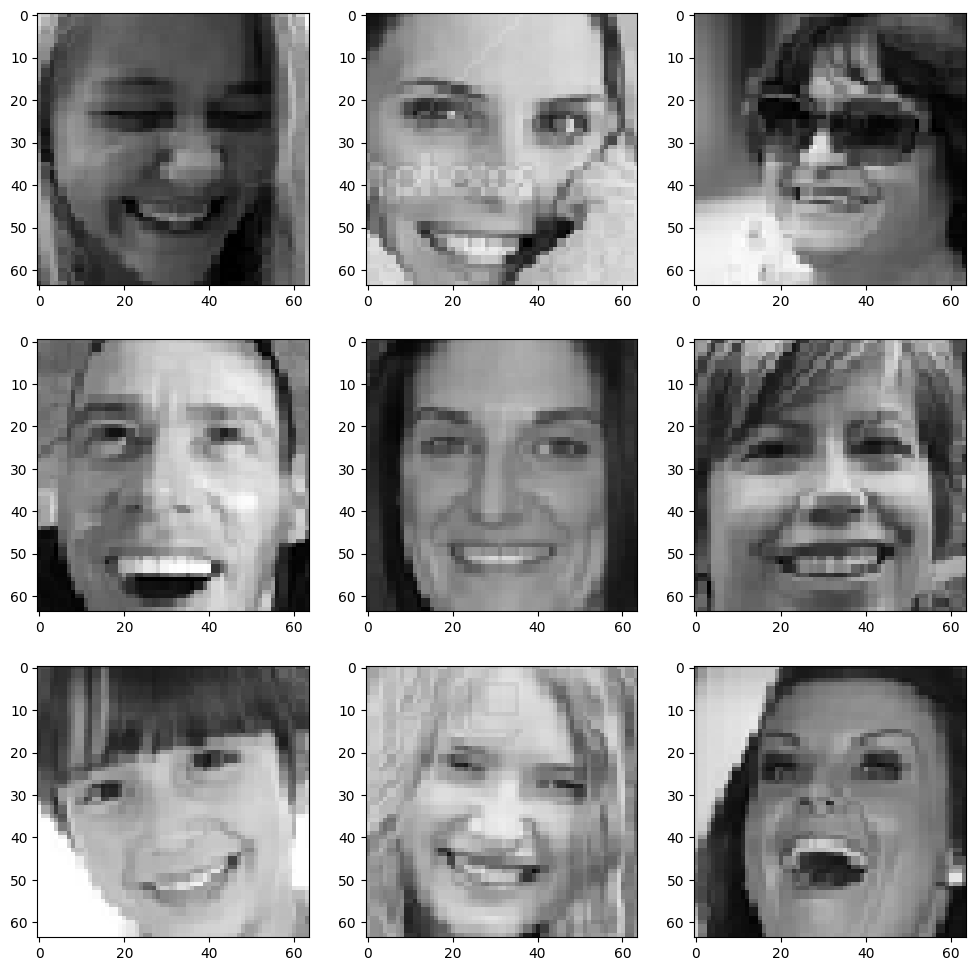

In [12]:
expression='3'

plt.figure(figsize=(12,12))
for i in range(1,20,1):
  plt.subplot(3,3,i)
  img=load_img(folder_path+"/train/"+expression+"/"+
               os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size,picture_size))
  plt.imshow(img)
plt.show()




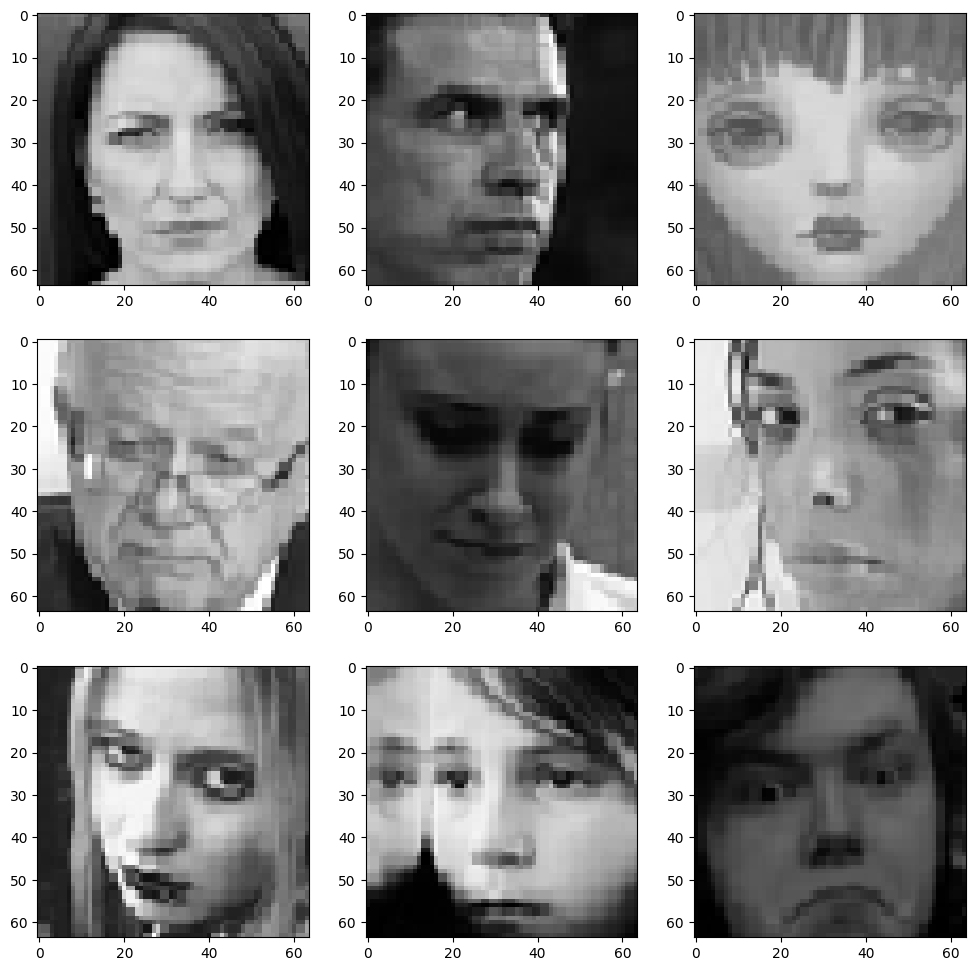

In [13]:
expression='4'

plt.figure(figsize=(12,12))
for i in range(11,20,1):
  plt.subplot(3,3,i-10)
  img=load_img(folder_path+"/train/"+expression+"/"+
               os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size,picture_size))
  plt.imshow(img)
plt.show()

In [16]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # summarize history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()
